#Importing required libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Loading the Dataset

In [3]:
medical_dataset = pd.read_csv('insurance.csv')

#Understanding the Dataset

In [4]:
medical_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
medical_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


###*No missing values in the dataset*

#Exploratory Data Analysis

In [35]:
num_cols=['age','bmi','children']
cat_cols=['sex','smoker','region']
target='charges'

**Perform Univariate analysis**

*For Numerical Columns:*

               age          bmi     children
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     1.094918
std      14.049960     6.098187     1.205493
min      18.000000    15.960000     0.000000
25%      27.000000    26.296250     0.000000
50%      39.000000    30.400000     1.000000
75%      51.000000    34.693750     2.000000
max      64.000000    53.130000     5.000000


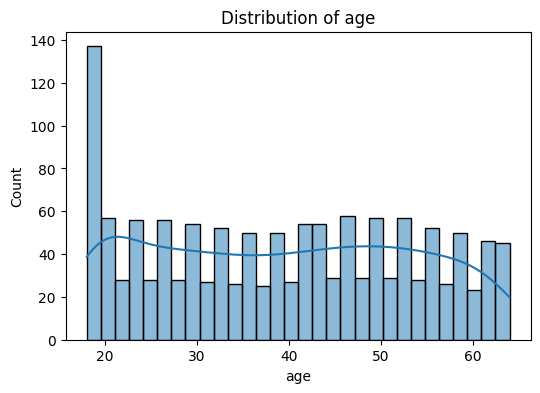

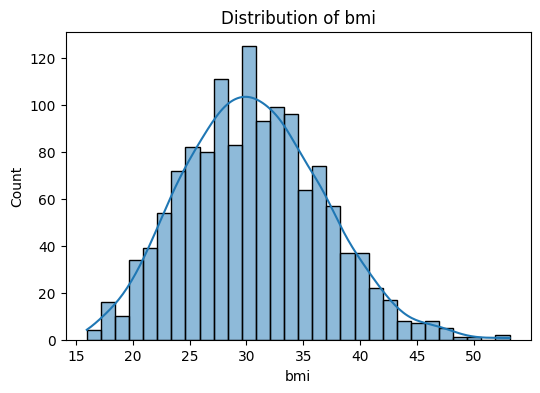

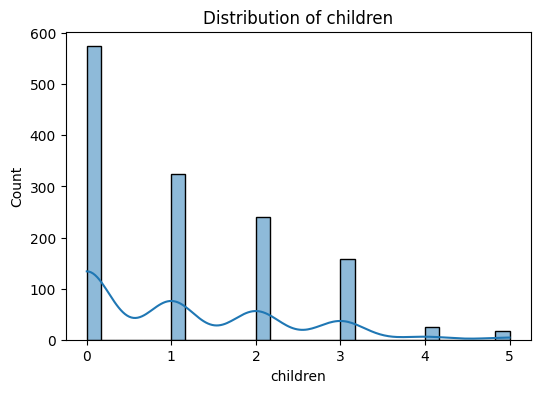

In [36]:
# Summary statistics
print(medical_dataset[num_cols].describe())

# Distribution plots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(medical_dataset[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

*For Categorical Columns:*

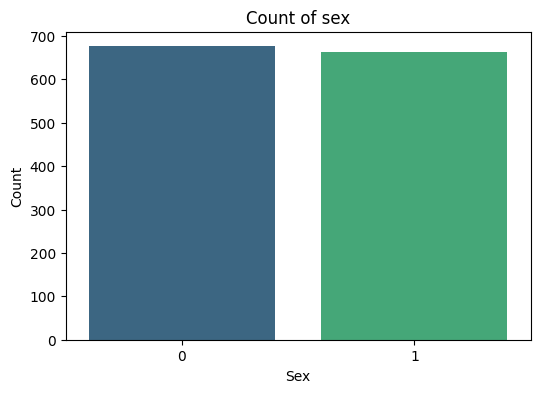

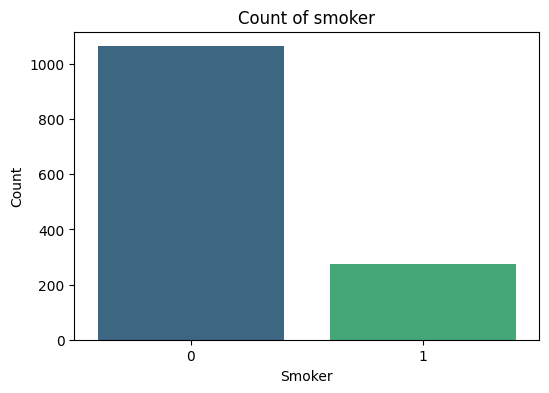

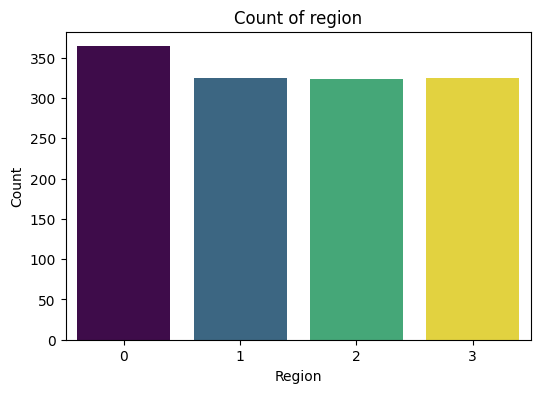

In [48]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=medical_dataset, x=col, palette='viridis',hue=col,legend=False)
    plt.title(f"Count of {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.show()

In [50]:
for col in cat_cols:
    print(f"Frequency counts for {col}:\n")
    print(medical_dataset[col].value_counts())
    print("\n")

Frequency counts for sex:

sex
0    676
1    662
Name: count, dtype: int64


Frequency counts for smoker:

smoker
0    1064
1     274
Name: count, dtype: int64


Frequency counts for region:

region
0    364
1    325
3    325
2    324
Name: count, dtype: int64




##Converting Categorical Features to Numerical

In [51]:
#encoding the sex columns
medical_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# smoker columsn

medical_dataset.replace({'smoker':{'yes':1,'no': 0}},inplace=True)

# for the region column

medical_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [52]:
medical_dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [53]:
medical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


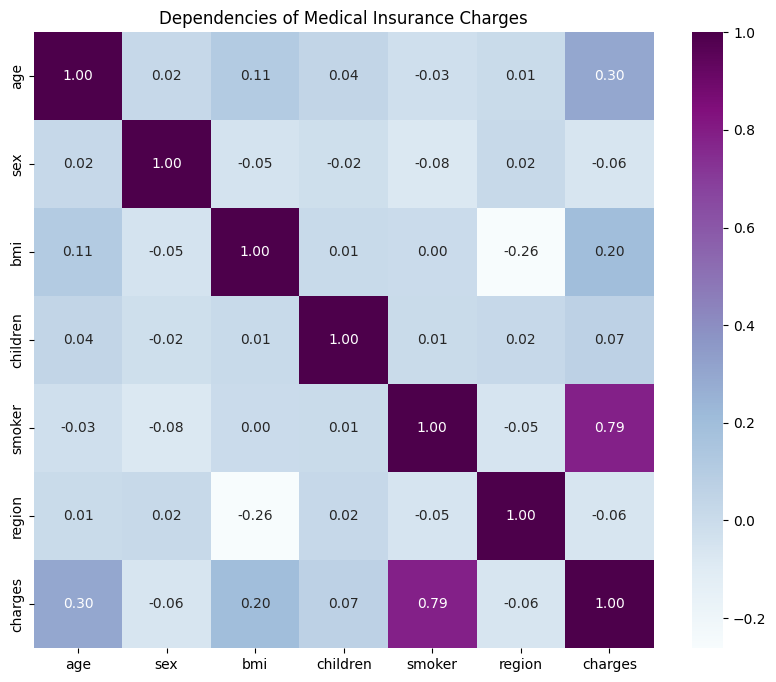

In [54]:
corr=medical_dataset.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt='.2f',ax=ax)
plt.title("Dependencies of Medical Insurance Charges")
plt.show()

###Smoker, BMI and Age are most important factor that determnines - Charges

Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

**Bivariate Analysis**

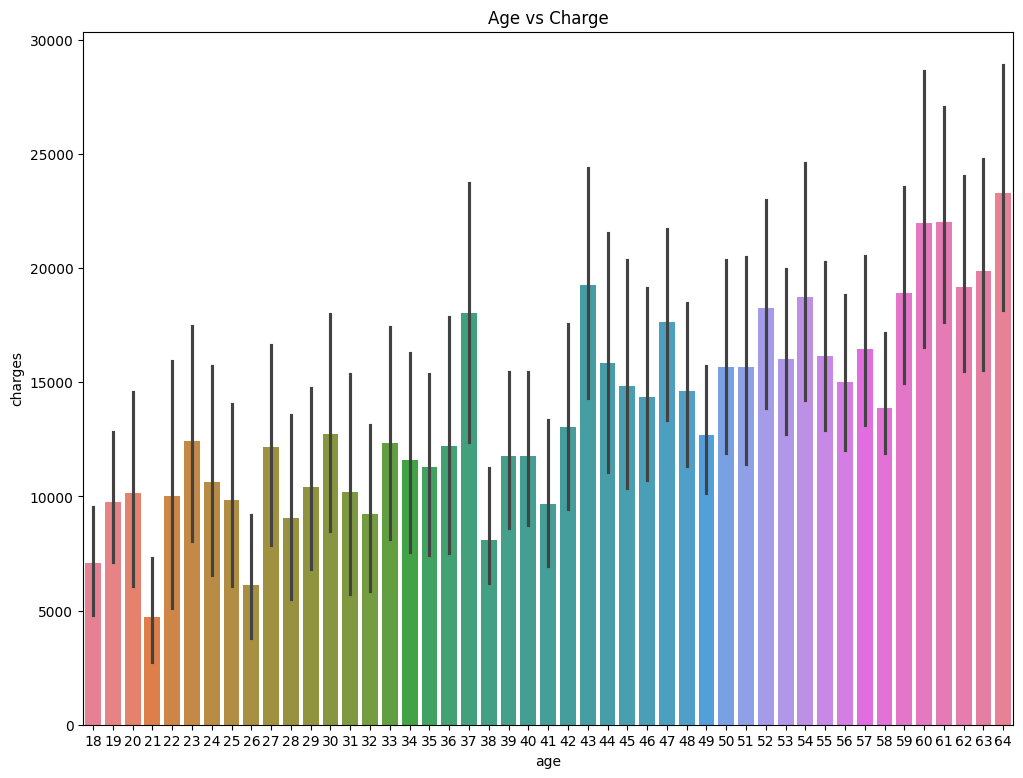

In [56]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=medical_dataset,palette='husl',hue='age',legend=False)
plt.show()

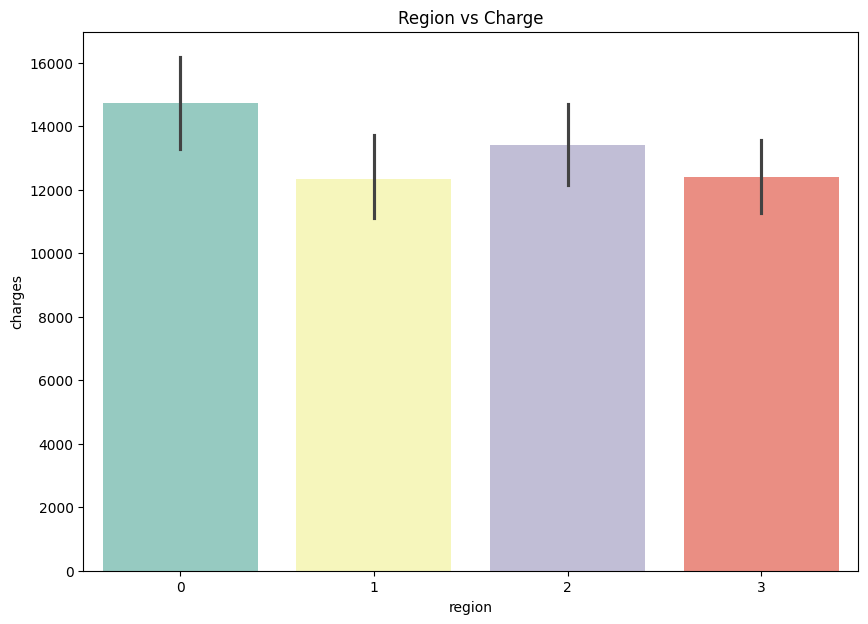

In [16]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=medical_dataset,palette='Set3',hue='region',legend=False)
plt.show()

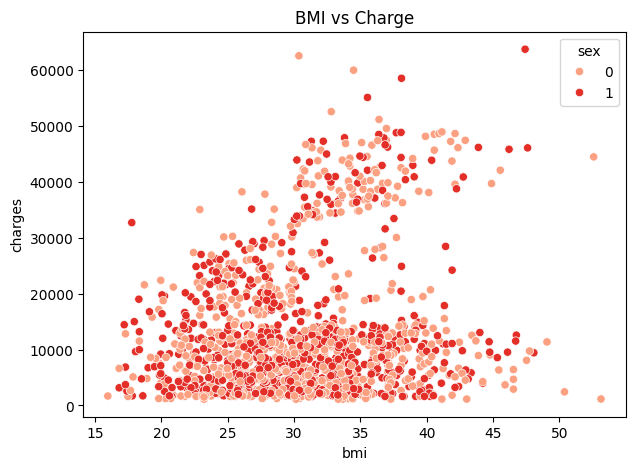

In [17]:
plt.figure(figsize=(7,5))
plt.title('BMI vs Charge')
sns.scatterplot(x='bmi',y='charges',data=medical_dataset,palette='Reds',hue='sex')
plt.show()

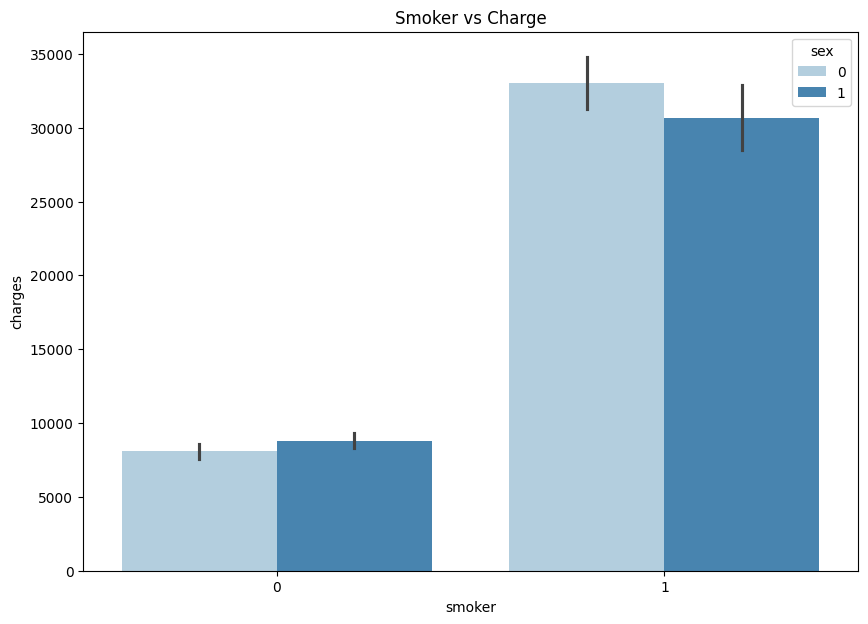

In [19]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=medical_dataset,palette='Blues',hue='sex')
plt.show()

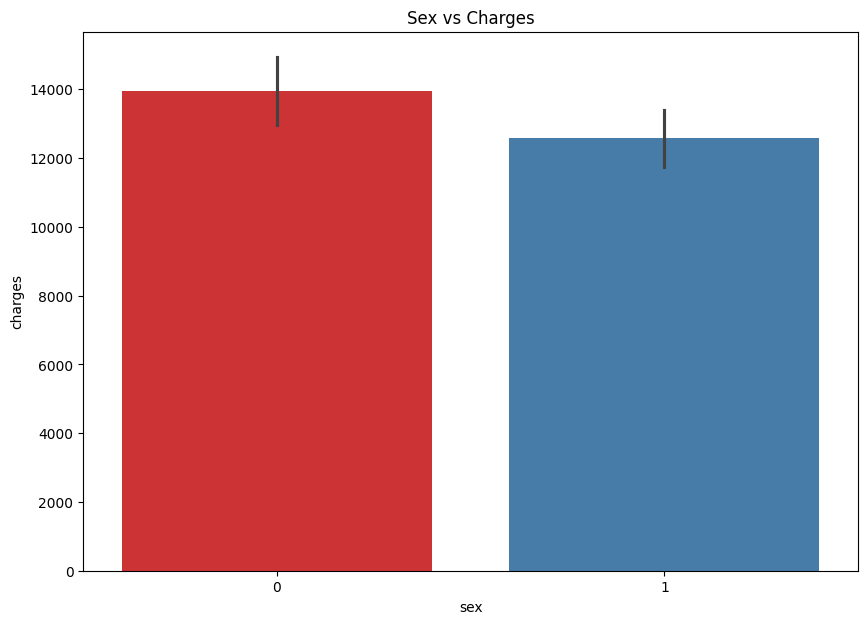

In [20]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=medical_dataset,palette='Set1',hue='sex',legend=False)
plt.show()

#Data Preprocessing

###Preparing data - We can scale BMI and Charges Column before proceeding with Prediction

In [90]:
from sklearn.preprocessing import StandardScaler
data_pre = medical_dataset.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,1,0.298584
1,-1.509965,0,0.509621,1,0,0,-0.953689
2,-0.797954,0,0.383307,3,0,0,-0.728675
3,-0.441948,0,-1.305531,0,0,3,0.719843
4,-0.513149,0,-0.292556,0,0,3,-0.776802


In [74]:
X = data_pre.drop(columns='charges',axis=1)
Y  = data_pre['charges']

sc=StandardScaler()
X=sc.fit_transform(X)

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', Y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', Y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070,)
Size of X_test :  (268, 6)
Size of Y_test :  (268,)


#Model Building

##Linear Regression



In [76]:
# loading the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [77]:
y_pred_train=linear_regressor.predict(X_train)
y_pred_test=linear_regressor.predict(X_test)

#Evaluation on training data
print('Training data performance:')
print('Mean Absolute Error:',mean_absolute_error(Y_train,y_pred_train))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train,y_pred_train)))
print('R2 Score:',r2_score(Y_train,y_pred_train))

#Evaluation on test data
print('\nTesting data performance:')
print('Mean Absolute Error:',mean_absolute_error(Y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,y_pred_test)))
print('R2 Score:',r2_score(Y_test,y_pred_test))

Training data performance:
Mean Absolute Error: 0.3481808001311843
Root Mean Squared Error: 0.5047644539552926
R2 Score: 0.7413131194887538

Testing data performance:
Mean Absolute Error: 0.3461422816679445
Root Mean Squared Error: 0.4794464432336793
R2 Score: 0.783021587162344


##RandomForest Regressor

In [79]:
#Create and train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_reg.fit(X_train, Y_train)

#Make predictions
y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)

#Evaluation on training data
print('Training data performance:')
print('Mean Absolute Error:',mean_absolute_error(Y_train,y_pred_train))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train,y_pred_train)))
print('R2 Score:',r2_score(Y_train,y_pred_train))

#Evaluation on test data
print('\nTesting data performance:')
print('Mean Absolute Error:',mean_absolute_error(Y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,y_pred_test)))
print('R2 Score:',r2_score(Y_test,y_pred_test))

Training data performance:
Mean Absolute Error: 0.08589508484040993
Root Mean Squared Error: 0.15416417729627105
R2 Score: 0.9758696392152221

Testing data performance:
Mean Absolute Error: 0.20683939394721193
Root Mean Squared Error: 0.3751719144564061
R2 Score: 0.8671391689581076


##Support Vector Machine (Regression)

In [80]:
svr = SVR()
svr.fit(X_train, Y_train)

SVR()

In [81]:
#Make predictions
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

#Evaluation on training data
print('Training data performance:')
print('Mean Absolute Error:',mean_absolute_error(Y_train,y_pred_train))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train,y_pred_train)))
print('R2 Score:',r2_score(Y_train,y_pred_train))

#Evaluation on test data
print('\nTesting data performance:')
print('Mean Absolute Error:',mean_absolute_error(Y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,y_pred_test)))
print('R2 Score:',r2_score(Y_test,y_pred_test))

Training data performance:
Mean Absolute Error: 0.19843629149419378
Root Mean Squared Error: 0.3786444859408263
R2 Score: 0.85443393252628

Testing data performance:
Mean Absolute Error: 0.20070862949792706
Root Mean Squared Error: 0.376754670735762
R2 Score: 0.8660157912258144


In [84]:
#Predict using models
y_pred_linreg=linear_regressor.predict(X_test)
y_pred_rf=rf_reg.predict(X_test)
y_pred_svr=svr.predict(X_test)

#Calculate  performance metrics using Linear Regression
mae_linreg=mean_absolute_error(Y_test,y_pred_linreg)
rmse_linreg=np.sqrt(mean_squared_error(Y_test,y_pred_linreg))
r2_score_linreg=r2_score(Y_test,y_pred_linreg)

#Calculate  performance metrics using Random Forest Regressor
mae_rf=mean_absolute_error(Y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(Y_test,y_pred_rf))
r2_score_rf=r2_score(Y_test,y_pred_rf)

#Calculate  performance metrics using Support vector regression(SVR)
mae_svr=mean_absolute_error(Y_test,y_pred_svr)
rmse_svr=np.sqrt(mean_squared_error(Y_test,y_pred_svr))
r2_score_svr=r2_score(Y_test,y_pred_svr)

In [85]:
models = [('Linear Regression', mae_linreg, rmse_linreg, r2_score_linreg),
          ('Random Forest Regression', mae_rf, rmse_rf, r2_score_rf),
          ('Support Vector Regression', mae_svr, rmse_svr, r2_score_svr)
         ]

In [86]:
predict = pd.DataFrame(data = models, columns=['Model', 'MAE', 'RMSE', 'R2_Score'])
predict

,Model,MAE,RMSE,R2_Score
0,Linear Regression,0.346142,0.479446,0.783022
1,Random Forest Regression,0.206839,0.375172,0.867139
2,Support Vector Regression,0.200709,0.376755,0.866016


**Summary & Comparison**



*   **Best Model:** Random Forest Regression (highest R² and overall accuracy).

*   **Second best:** Support Vector Regression (almost identical to Random Forest).


*   **Worst:** Linear Regression (higher error metrics and lower R²)



In conclusion, Random Forest and SVR both offer superior performance over Linear Regression for this particular task, with Random Forest being marginally better in terms of overall fit and prediction accuracy.





#Building Final Model

In [91]:
X_ = medical_dataset.drop('charges',axis=1).values
y_ = medical_dataset['charges'].values.reshape(-1,1)

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of X_test_ :  (268, 6)
Size of Y_test_ :  (268, 1)


In [92]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [93]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.884
R2 score (test) : 0.877


##Predicting Medical Insurance Cost with sample new data

###While giving input use the following format:
For sex:
*   Male: 0
*   Female: 0

For smoker:
*   yes: 1
*   no: 0

For region column:
*   southeast: 0
*   southwest: 1
*   northeast: 2
*   northwest: 3







In [96]:
pred=rf_reg.predict(np.array([28,0,33.770,3,0,0]).reshape(1,6))[0]

print("The person will get insurance money = ",pred)

The person will get insurance money =  4894.223297720991
